# Importing the Dataset

In [5]:
import pandas as pd

messages = pd.read_csv('SMSSpamCollection.txt', sep='\t', names=["label", "message"])
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# Data cleaning and preprocessing

In [6]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
wnl = WordNetLemmatizer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
    review = review.lower()
    review = review.split()
    
    review = [wnl.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

# Creating the Bag of Words model

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

In [9]:
y=pd.get_dummies(messages['label'])
y=y.iloc[:,1].values

# Train Test Split

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Training model using Naive bayes classifier

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix

The accuracy is 0.9829596412556054
The precision is 0.9433962264150944
The recall is 0.9375
The F1-Score is 0.9404388714733543
The Matthews correlation coefficient is0.9305027727658416


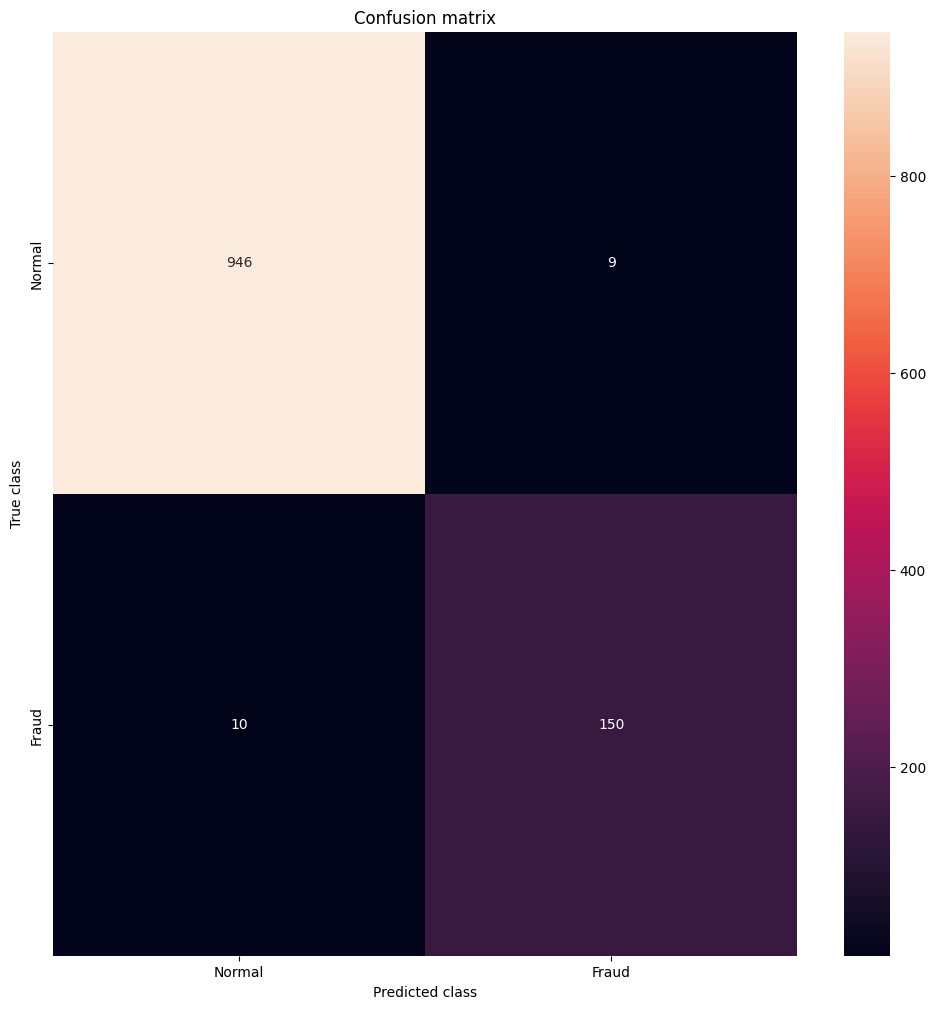

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB().fit(X_train, y_train)
y_pred=nb.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("The accuracy is {}".format(acc))

prec = precision_score(y_test, y_pred)
print("The precision is {}".format(prec))

rec = recall_score(y_test, y_pred)
print("The recall is {}".format(rec))

f1 = f1_score(y_test, y_pred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(y_test, y_pred)
print("The Matthews correlation coefficient is{}".format(MCC))
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

The accuracy is 0.9748878923766816
The precision is 0.9285714285714286
The recall is 0.89375
The F1-Score is 0.910828025477707
The Matthews correlation coefficient is0.8964421517509058


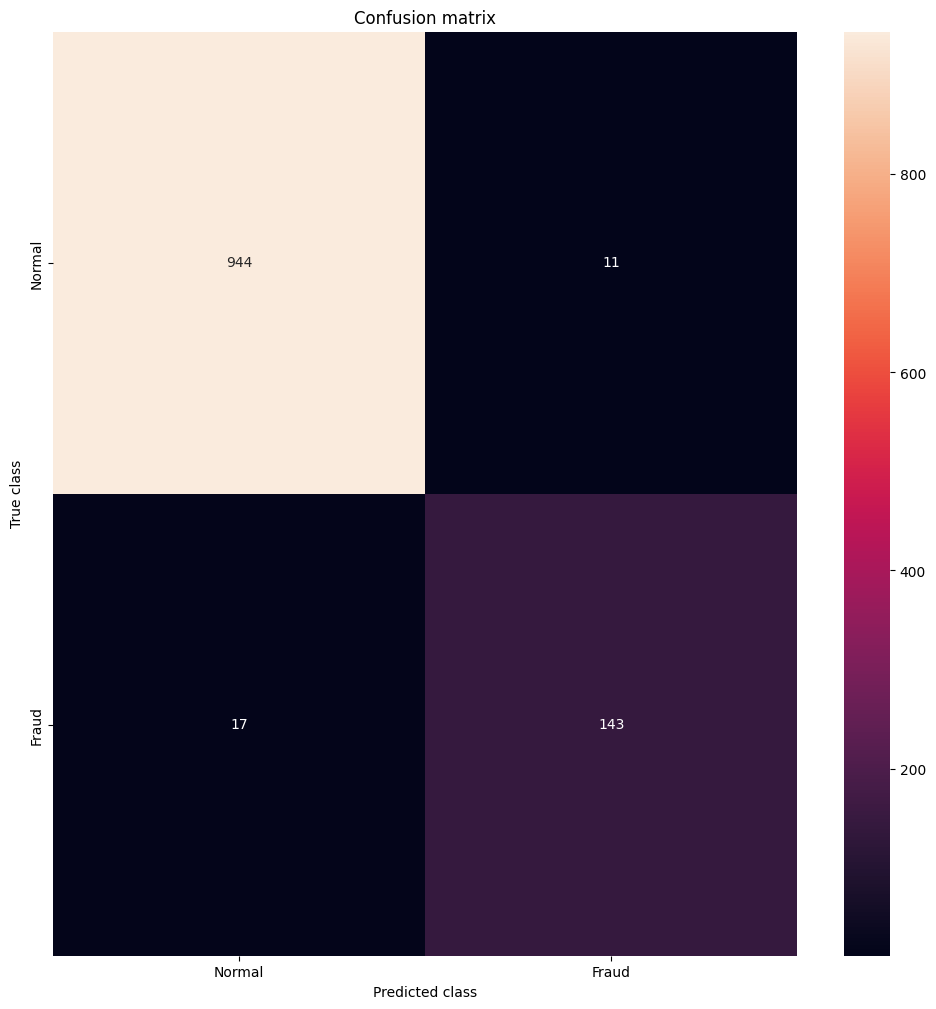

In [13]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier().fit(X_train, y_train)
y_pred=dtc.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("The accuracy is {}".format(acc))

prec = precision_score(y_test, y_pred)
print("The precision is {}".format(prec))

rec = recall_score(y_test, y_pred)
print("The recall is {}".format(rec))

f1 = f1_score(y_test, y_pred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(y_test, y_pred)
print("The Matthews correlation coefficient is{}".format(MCC))
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

The accuracy is 0.9829596412556054
The precision is 1.0
The recall is 0.88125
The F1-Score is 0.9368770764119602
The Matthews correlation coefficient is0.9295478963351532


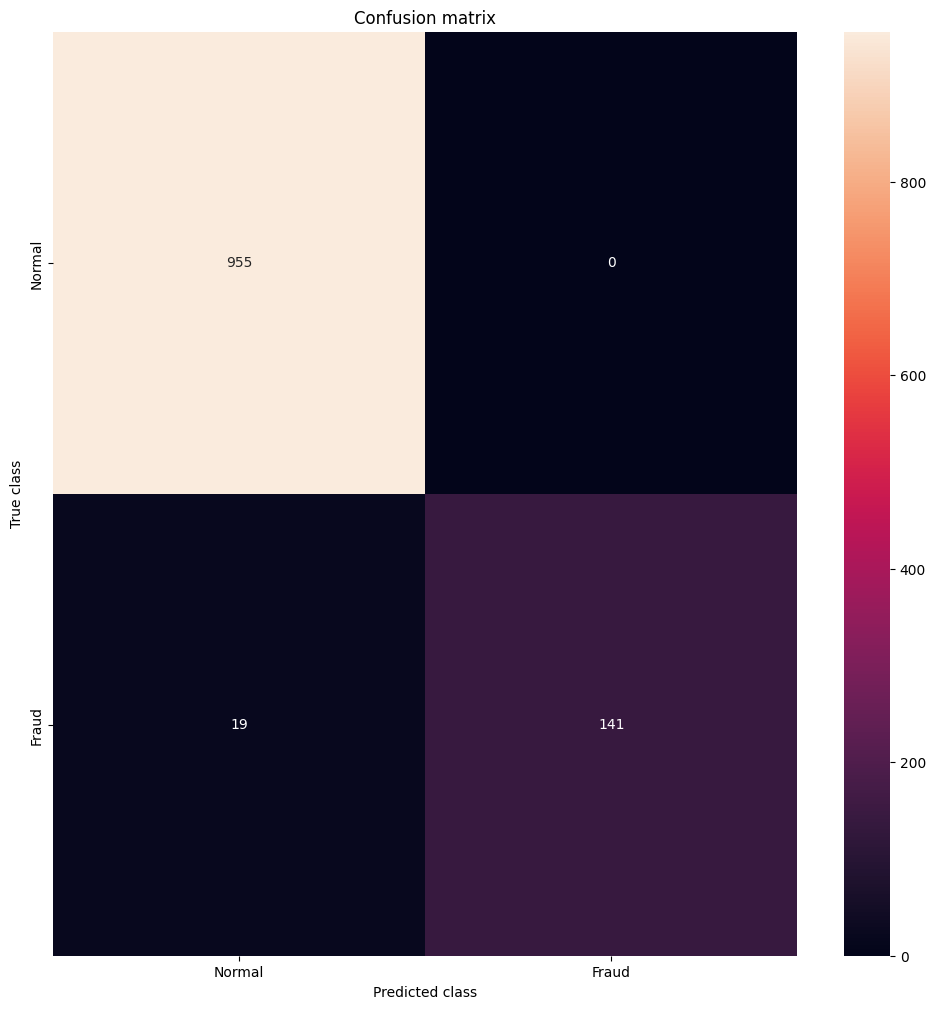

In [28]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier().fit(X_train, y_train)
y_pred=rfc.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("The accuracy is {}".format(acc))

prec = precision_score(y_test, y_pred)
print("The precision is {}".format(prec))

rec = recall_score(y_test, y_pred)
print("The recall is {}".format(rec))

f1 = f1_score(y_test, y_pred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(y_test, y_pred)
print("The Matthews correlation coefficient is{}".format(MCC))
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

The model used is Bagging with K Neighbors Classifier
The accuracy is 0.9264573991031391
The precision is 1.0
The recall is 0.4875
The F1-Score is 0.6554621848739496
The Matthews correlation coefficient is0.6700382838556379


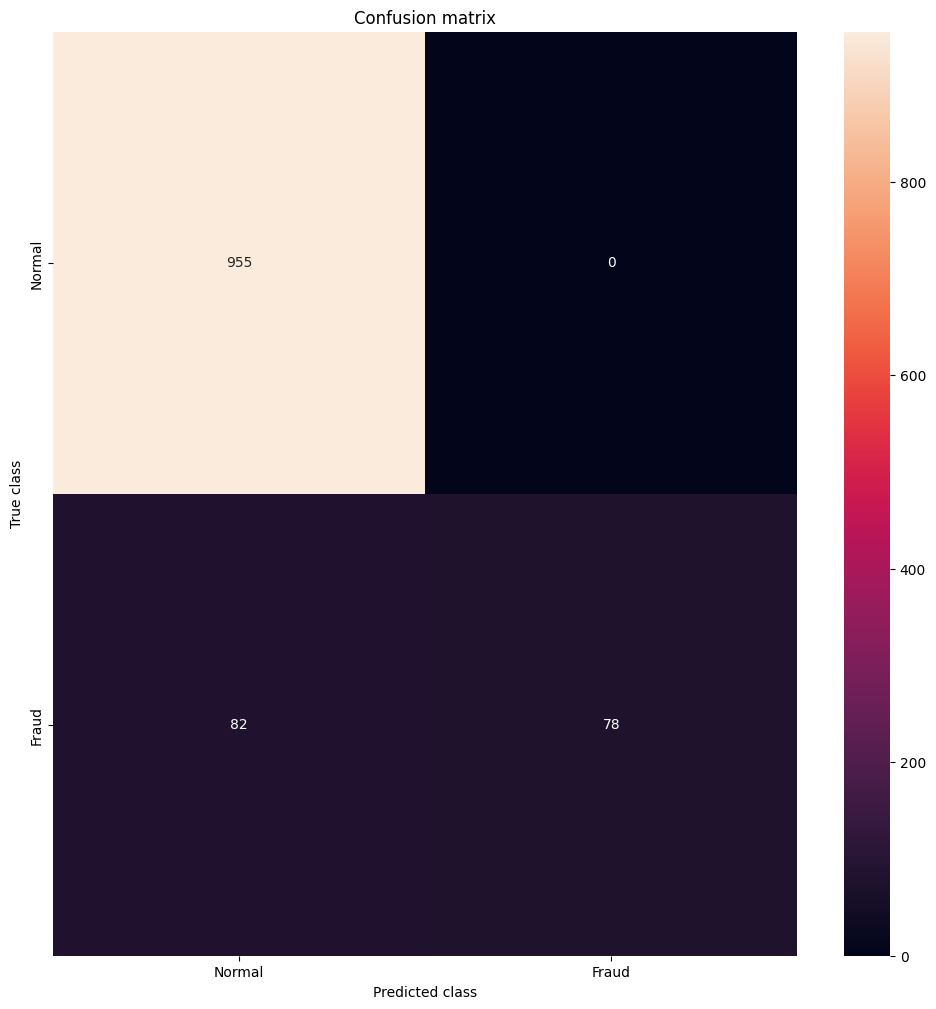

In [29]:
from sklearn.neighbors import KNeighborsClassifier
rKNN =  KNeighborsClassifier().fit(X_train, y_train)
yPred = rKNN.predict(X_test)

print("The model used is Bagging with K Neighbors Classifier")

acc = accuracy_score(y_test, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(y_test, yPred)
print("The precision is {}".format(prec))

rec = recall_score(y_test, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(y_test, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(y_test, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))

LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d")
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()